In [2]:
# 模型构建 C盘
# 详解AIC方式定信息准则　＋　ARMA 
import pandas as pd
inputfile = 'attrsConstruction.xlsx'

data = pd.read_excel(inputfile)
df = data.iloc[:len(data)-5]
df


,SYS_NAME,CWXT_DB:184:C:\,CWXT_DB:184:D:\,COLLECTTIME
0,财务管理系统,34270787.33,80262592.65,2014-10-01
1,财务管理系统,34328899.02,83200151.65,2014-10-02
2,财务管理系统,34327553.50,83208320.00,2014-10-03
3,财务管理系统,34288672.21,83099271.65,2014-10-04
4,财务管理系统,34190978.41,82765171.65,2014-10-05
5,财务管理系统,34187614.43,82522895.00,2014-10-06
6,财务管理系统,34285280.22,82590885.00,2014-10-07
7,财务管理系统,34290578.41,82368173.30,2014-10-08
8,财务管理系统,33211870.40,82172263.30,2014-10-09
9,财务管理系统,33249253.87,81922685.00,2014-10-10


In [6]:
# 第 * 1 * 步--C盘---------平稳性检测
#1)平稳性检测 ：判断是否平稳，若不平稳，对其进行差分处理直至平稳
# 方法：采用单位根检验（ADF）的方法或者时序图的方法（见数据探索模块）
# 注意：其他平稳性检验方法见steadyCheck.py文件
from statsmodels.tsa.stattools import adfuller as ADF
diff = 0
# 判断D盘数据的平稳性，以及确定几次差分后平稳
adf = ADF(df['CWXT_DB:184:C:\\'])
print(adf) 

while adf[1] >= 0.05 : # adf[1]是p值，p值小于0.05认为是平稳的
    print(adf[1])
    diff = diff + 1
    print(diff)
    adf = ADF(df['CWXT_DB:184:C:\\'].diff(diff).dropna())#注意，差分后使用ADF检验时，必须去掉空值
    
print(u'原始序列经过%s阶差分后归于平稳，p值为%s' % (diff, adf[1]))
df['CWXT_DB:184:C:\\_adf'] = df['CWXT_DB:184:C:\\'].diff(1)

(-0.5635118147156262, 0.8790155702809298, 3, 38, {'1%': -3.6155091011809297, '5%': -2.941262357486514, '10%': -2.6091995013850418}, 859.9976220423233)
0.8790155702809298
1
原始序列经过1阶差分后归于平稳，p值为9.572975592333072e-07


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
# 第 * 2 * 步--C盘---------白噪声检验
# 目的：验证序列中有用信息是否已经被提取完毕，需要进行白噪声检验。若序列是白噪声序列，说明序列中有用信息已经被提取完，只剩随机扰动
# 方法：采用LB统计量的方法进行白噪声检验
# 若没有通过白噪声检验，则需要进行模型识别，识别其模型属于AR、MA还是ARMA。

inputfile2 = 'attrsConstruction.xlsx'
data1 = pd.read_excel(inputfile2)
data1 = data1.iloc[:len(data1)-5]# 不使用最后五个数据（作为预测参考）

# 白噪声检测
from statsmodels.stats.diagnostic import acorr_ljungbox

[[lb], [p]] = acorr_ljungbox(data1['CWXT_DB:184:C:\\'], lags = 1) ## lags是残差延迟个数
if p < 0.05:
    print (u'原始序列为非白噪声序列，对应的p值为：%s' % p)
else:
    print (u'原始序列为白噪声序列，对应的p值为：%s' % p)

[[lb], [p]] = acorr_ljungbox(data1['CWXT_DB:184:C:\\'].diff(1).dropna(), lags = 1)
if p < 0.05:
    print (u'一阶差分序列为非白噪声序列，对应的p值为：%s' % p)
else:
    print (u'一阶差分序列为白噪声序列，对应的p值为：%s' % p)

原始序列为非白噪声序列，对应的p值为：1.0609907508070775e-08
一阶差分序列为白噪声序列，对应的p值为：0.4745522552554281


In [9]:
# 第 * 3 * 步----------模型识别
# 方法：采用极大似然比方法进行模型的参数估计，估计各个参数的值。
# 然后针对各个不同模型，采用信息准则方法（有三种：BIC/AIC/HQ)对模型进行定阶，确定p,q参数，从而选择最优模型。
# 注意，进行此步时，index需要为时间序列类型
# 确定最佳p、d、q的值
inputfile3 = 'attrsConstruction.xlsx'
data2 = pd.read_excel(inputfile3,index_col='COLLECTTIME')
xtest_value=data2['CWXT_DB:184:C:\\'][-5:]
data2 = data2.iloc[:len(data2)-5]# 不使用最后五个数据（作为预测参考） 
xdata2 = data2['CWXT_DB:184:C:\\']
# ARIMA（p,d,q）中,AR是自回归,p为自回归项数；MA为滑动平均,q为滑动平均项数,d为使之成为平稳序列所做的差分次数(阶数)，由前一步骤知d=1
# from statsmodels.tsa.arima_model import ARIMA#建立ARIMA（p,d，q）模型
from statsmodels.tsa.arima_model import ARMA #建立ARMA（p,q）模型

# 定阶
# 目前选择模型常用如下准则!!!!!
# 增加自由参数的数目提高了拟合的优良性，
# AIC/BIC/HQ鼓励数据拟合的优良性但是尽量避免出现过度拟合(Overfitting)的情况。所以优先考虑的模型应是AIC/BIC/HQ值最小的那一个
#* AIC=-2 ln(L) + 2 k 中文名字：赤池信息量 akaike information criterion (AIC)
# * BIC=-2 ln(L) + ln(n)*k 中文名字：贝叶斯信息量 bayesian information criterion (BIC)
# * HQ=-2 ln(L) + ln(ln(n))*k hannan-quinn criterion (HQ)

# AIC方式定信息准则　＋　ARMA --------！！！模型检验中也要对应修改！！！------------------------------

pmax = int(len(xdata2)/10) # 一般阶数不超过length/10
qmax = int(len(xdata2)/10) # 一般阶数不超过length/10

matrix = [] # aic矩阵
for p in range(pmax+1):
    tmp = []
    for q in range(qmax+1):
        try:#存在部分为空值，会报错
#             tmp.append(ARMA(xdata2, (p,q)).fit().bic) #  BIC方式
            tmp.append(ARMA(xdata2, (p,q)).fit().aic) #  AIC方式
#             tmp.append(ARMA(xdata2, (p,q)).fit().hq) #  HQ方式
        except:
            tmp.append(None)
            
    matrix.append(tmp)
    
matrix = pd.DataFrame(matrix) # 从中可以找出最小值
print(matrix)
print(matrix.stack())

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be 

             0            1            2            3            4
0  1250.608691  1224.271131  1206.309678          NaN  1203.856252
1  1192.649659  1194.567527  1195.903058          NaN  1195.878980
2  1194.590234  1195.097381  1197.571540  1195.979544  1197.786101
3  1196.134309  1198.606738  1198.582380  1197.911732  1199.649845
4  1194.144212  1194.989864  1196.874237  1196.023417  1198.952620
0  0    1250.608691
   1    1224.271131
   2    1206.309678
   4    1203.856252
1  0    1192.649659
   1    1194.567527
   2    1195.903058
   4    1195.878980
2  0    1194.590234
   1    1195.097381
   2    1197.571540
   3    1195.979544
   4    1197.786101
3  0    1196.134309
   1    1198.606738
   2    1198.582380
   3    1197.911732
   4    1199.649845
4  0    1194.144212
   1    1194.989864
   2    1196.874237
   3    1196.023417
   4    1198.952620
dtype: float64


In [11]:
# 第 * 4 * 步--C盘---------模型检验
# 确定模型后，需要检验其残差序列是否是白噪声，若不是，说明，残差中还存在有用的信息，需要修改模型或者进一步提取。
# 若其残差不是白噪声，重新更换p,q的值，重新确定
import pandas as pd
import numpy as np

while 1:
    p, q = matrix.stack().idxmin() # 先展平该表格，然后找出最小值的索引位置
    print (u'当前AIC最小的p值与q值分别为：%s、%s' % (p,q))
    
    lagnum = 12 # 残差延迟个数

    arma = ARMA(xdata2, (p,q)).fit() # 建立并训练模型
    xdata_pred = arma.predict() # 预测
    pred_error = (xdata_pred - xdata2).dropna() # 计算残差

    # 白噪声检测
    from statsmodels.stats.diagnostic import acorr_ljungbox

    lbx, px = acorr_ljungbox(pred_error, lags = lagnum)
    h = (px < 0.05).sum() # p值小于0.05，认为是非噪声
    if h > 0:
        print (u'模型ARMA(%s,%s)不符合白噪声检验' % (p,q))
        print ('在AIC矩阵中去掉[%s,%s]组合，重新进行计算' % (p,q))
        matrix.iloc[p,q] =  np.nan
        arimafail = arma
        continue
    else:
        print (p,q)
        print (u'模型ARMA(%s,%s)符合白噪声检验' % (p,q))
        break
        
        

当前AIC最小的p值与q值分别为：1、0
1 0
模型ARMA(1,0)符合白噪声检验


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [12]:
arma.summary() # 当p,q值为0，0时，summary方法报错

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:        CWXT_DB:184:C:\   No. Observations:                   42
Model:                     ARMA(1, 0)   Log Likelihood                -593.325
Method:                       css-mle   S.D. of innovations         324533.697
Date:                Mon, 02 Sep 2019   AIC                           1192.650
Time:                        18:15:00   BIC                           1197.863
Sample:                    10-01-2014   HQIC                          1194.560
                         - 11-11-2014                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   3.48e+07   3.59e+05     96.862      0.000    3.41e+07    3.55e+07
ar.L1.CWXT_DB:184:C:\     0.8797      0.070     12.579      0.000       0.743       1.017
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1367           +0.0000j            1.1367            0.0000
-----------------------------------------------------------------------------
"""

In [36]:
forecast_values, forecasts_standard_error, forecast_confidence_interval = arma.forecast(5)#预测5次
forecast_values

array([35581705.89246708, 35488222.8438646 , 35405985.60720885,
       35333641.33523785, 35269999.92533833, 35214014.4417105 ,
       35164763.8927049 , 35121438.08000893, 35083324.27044403,
       35049795.47111732])

In [19]:
xdata_pred.tail()

2014-11-07    3.551042e+07
2014-11-08    3.545744e+07
2014-11-09    3.542599e+07
2014-11-10    3.540887e+07
2014-11-11    3.550607e+07
Freq: D, dtype: float64

In [21]:
predictdata = pd.DataFrame(xtest_value)
predictdata.insert(1,'CWXT_DB:184:C:\\_predict',forecast_values)
predictdata.rename(columns={'CWXT_DB:184:C:\\':u'实际值','CWXT_DB:184:C:\_predict':u'预测值'},inplace=True)
predictdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2014-11-12 to 2014-11-16
Data columns (total 2 columns):
实际值    5 non-null float64
预测值    5 non-null float64
dtypes: float64(2)
memory usage: 120.0 bytes


In [22]:
result_d = predictdata.applymap(lambda x: '%.2f' % x) # 将表格中各个浮点值都格式化
result_d.to_excel('pedictdata_C_AIC_ARMA.xlsx')
result_d

,实际值,预测值
COLLECTTIME,,
2014-11-12,35704312.58,35581705.89
2014-11-13,35704980.73,35488222.84
2014-11-14,34570385.45,35405985.61
2014-11-15,34673820.69,35333641.34
2014-11-16,34793245.31,35269999.93


In [27]:
# 第 * 5 * 步--D盘---------模型评价
# 为了评价时序预测模型效果的好坏，本章采用3个衡量模型预测精度的统计量指标：平均绝对误差、均方根误差、平均绝对百分误差
# -*- coding:utf-8 -*-
import pandas as pd

inputfile4 = 'pedictdata_C_AIC_ARMA.xlsx'
result = pd.read_excel(inputfile4,index_col='COLLECTTIME')
result = result.applymap(lambda x: x/10**6)
print (result)

# 计算误差
abs_ = (result[u'预测值']-result[u'实际值']).abs()
mae_ = abs_.mean() # mae平均绝对误差
rmas_ = ((abs_**2).mean())**0.5 #rmas均方根误差
mape_ = (abs_/result[u'实际值']).mean() #mape平均绝对百分误差
# print abs_
print (mae_)
print (rmas_)
print (mape_)
errors = 1.5
print ('误差阈值为%s' % errors)
if (mae_ < errors) & (rmas_ < errors) & (mape_ < errors):
    print (u'平均绝对误差为：%.4f, \n均方根误差为：%.4f, \n平均绝对百分误差为：%.4f' % (mae_, rmas_, mape_))
    print ('误差检验通过！')
else:
    print('误差检验不通过！')

                   实际值        预测值
COLLECTTIME                      
2014-11-12   35.704313  35.581706
2014-11-13   35.704981  35.488223
2014-11-14   34.570385  35.405986
2014-11-15   34.673821  35.333641
2014-11-16   34.793245  35.270000
0.4623080019999975
0.5334608267829601
0.0132815193492983
误差阈值为1.5
平均绝对误差为：0.4623, 
均方根误差为：0.5335, 
平均绝对百分误差为：0.0133
误差检验通过！


In [46]:
inputfile = 'attrsConstruction.xlsx'
 
data = pd.read_excel(inputfile)
df = data.iloc[:len(data)-5]
 
inputfile1 = 'pedictdata_C.xlsx'# 预测值
result = pd.read_excel(inputfile1)
inputfile2 = 'pedictdata_D.xlsx'# 预测值
result1 = pd.read_excel(inputfile2)
 

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rc('figure',figsize=(10,8))
import datetime
import matplotlib.dates as mdates
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']= False

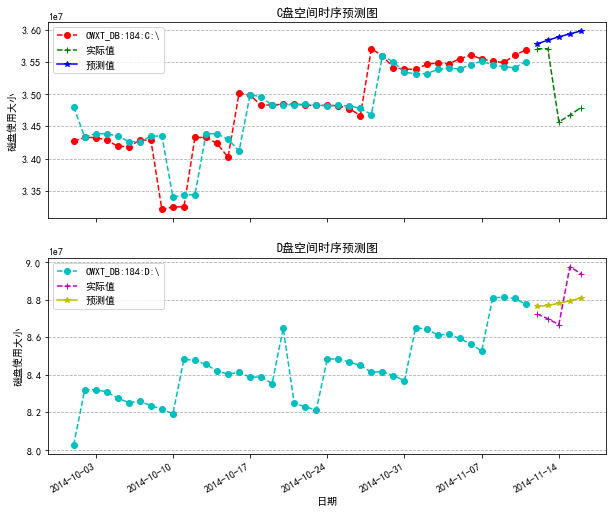

In [54]:
fig  = plt.figure()
fig.set(alpha=0.2)#设置图标透明度
 
ax = fig.add_subplot(2,1,1)
ax.set_title(u"C盘空间时序预测图")
 
ax.set(xlabel=u'日期',ylabel=u'磁盘使用大小')
# 图上时间间隔显示为10天
ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=range(1,32), interval=7)) 
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.subplots_adjust(bottom=0.13,top=0.95)
ax.plot(df['COLLECTTIME'],df['CWXT_DB:184:C:\\'],'ro--',)
ax.plot(xdata_pred,'co--')
ax.plot(result['COLLECTTIME'],result[u'实际值'],'g+--',)
ax.plot(result['COLLECTTIME'],result[u'预测值'],'b*-',)
ax.grid(axis='y',linestyle='--')
ax.legend()
fig.autofmt_xdate() #自动根据标签长度进行旋转
'''for label in ax.xaxis.get_ticklabels():   #此语句完成功能同上
       label.set_rotation(45)
'''
 
ax1 = fig.add_subplot(2,1,2)
ax1.set_title(u"D盘空间时序预测图")
# ax.set_xlabel(u'日期')
ax1.set(xlabel=u'日期',ylabel=u'磁盘使用大小')
# 图上时间间隔显示为10天
ax1.xaxis.set_major_locator(mdates.DayLocator(bymonthday=range(1,32), interval=7)) 
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.subplots_adjust(bottom=0.13,top=0.95)
ax1.plot(df['COLLECTTIME'],df['CWXT_DB:184:D:\\'],'co--',)
ax1.plot(result1['COLLECTTIME'],result1[u'实际值'],'m+--',)
ax1.plot(result1['COLLECTTIME'],result1[u'预测值'],'y*-',) 
ax1.grid(axis='y',linestyle='--')
ax1.legend()
fig.autofmt_xdate() #自动根据标签长度进行旋转
'''for label in ax.xaxis.get_ticklabels():   #此语句完成功能同上
       label.set_rotation(45)
'''
plt.savefig('data_predict_pic.jpg')
plt.show()

In [ ]:
# arimaf = ARIMA(xdata2, (0,1,1)).fit()
# arimaf.forecast(5)[0]
# 注意：
# 说明：由于用HQ训练模型时，都是空值，所以，本例使用HQ不合适
#-----ARIMA--BIC---
#                    实际值        预测值
# COLLECTTIME                      
# 2014-11-12   35.704313  35.722538
# 2014-11-13   35.704981  35.757104
# 2014-11-14   34.570385  35.791669
# 2014-11-15   34.673821  35.826235
# 2014-11-16   34.793245  35.860800
# 0.70232013
# 0.890203752645
# 0.0202432790493
# 误差阈值为1.5
# BIC模型下平均绝对误差为：0.7023, 
# 均方根误差为：0.8902, 
# 平均绝对百分误差为：0.0202
# 误差检验通过！
#-----ARIMA--AIC---
#                    实际值        预测值
# COLLECTTIME                      
# 2014-11-12   35.704313  35.779972
# 2014-11-13   35.704981  35.836938
# 2014-11-14   34.570385  35.889601
# 2014-11-15   34.673821  35.935428
# 2014-11-16   34.793245  35.981256
# 0.795290026
# 0.976369605661
# 0.0229009946085
# AIC模型下平均绝对误差为：0.7953, 
# 均方根误差为：0.9764, 
# 平均绝对百分误差为：0.0229
# 误差检验通过！
# 通过对比AIC与BIC的结果，可以发现BIC的几个误差均较小
#-----ARMA--BIC---
#                    实际值        预测值
# COLLECTTIME                      
# 2014-11-12   35.704313  35.581706
# 2014-11-13   35.704981  35.488223
# 2014-11-14   34.570385  35.405986
# 2014-11-15   34.673821  35.333641
# 2014-11-16   34.793245  35.270000
# 0.462308002
# 0.533460826783
# 0.0132815193493
# 误差阈值为1.5
# 平均绝对误差为：0.4623, 
# 均方根误差为：0.5335, 
# 平均绝对百分误差为：0.0133
# 误差检验通过！

# 综上：ARMA+BIC更优